# Filtering images with OpenCV

We will use this notebook to show how to filter images with OpenCV. We will use the following filters:

- Gaussian filter
- Median filter
- Bilateral filter
- Sobel filter
- Scharr filter
- Laplacian filter
- Canny filter
- Threshold filter
- Adaptive threshold filter
- Otsu threshold filter
- Contour filter
- Convex hull filter
- Approximation filter
- Bounding box filter

We will use the following image as an example:


In [2]:
import os
from IPython.display import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Original Image


(<Axes: title={'center': 'BW'}>,
 Text(0.5, 1.0, 'BW'))

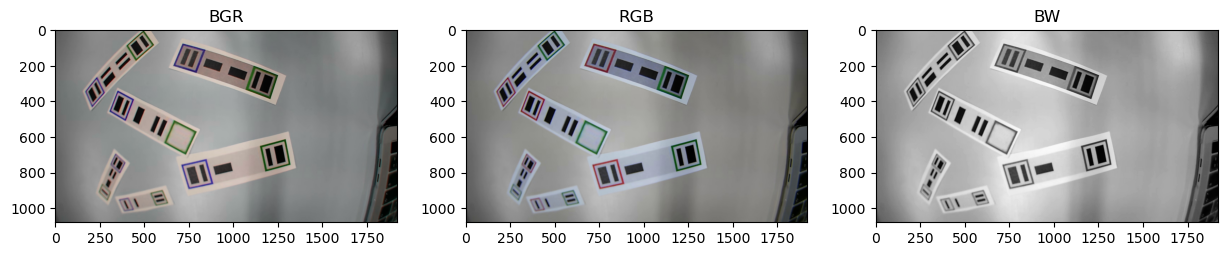

In [66]:
img_bgr = cv2.imread("mix_G1_64.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_bw = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Display the images.
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1), plt.imshow(img_bgr), plt.title('BGR')
plt.subplot(1, 3, 2), plt.imshow(img_rgb), plt.title('RGB')
plt.subplot(1, 3, 3), plt.imshow(img_bw, cmap='gray'), plt.title('BW')

## Gaussian filter

The Gaussian filter is a low-pass filter that removes the high-frequency components of an image. It is useful for reducing noise and blurring images. The filter is defined by the following equation:

$$ G(x, y) = \frac{1}{2\pi\sigma^2}e^{-\frac{x^2 + y^2}{2\sigma^2}} $$

where $x$ and $y$ are the coordinates of the pixel, and $\sigma$ is the standard deviation of the Gaussian distribution.

### Function sintax

```python
dst = cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])
```

### Parameters

- `src`: The input image.
- `ksize`: The size of the kernel. It must be an odd number.
- `sigmaX`: The standard deviation of the Gaussian distribution in the x-direction.
- `dst`: The output image.
- `sigmaY`: The standard deviation of the Gaussian distribution in the y-direction. If it is zero, it is set to `sigmaX`.
- `borderType`: The border mode used to extrapolate pixels outside the image.
  - `cv2.BORDER_CONSTANT`: The pixels are padded with a constant value.
  - `cv2.BORDER_REPLICATE`: The pixels are replicated from the edge pixels.
  - `cv2.BORDER_REFLECT`: The pixels are reflected from the edge pixels.
  - `cv2.BORDER_WRAP`: The pixels are wrapped around the edge pixels.
  - `OTHER`: The pixels are extrapolated using the specified border value.


(<Axes: title={'center': 'Gaussian 21x21'}>,
 Text(0.5, 1.0, 'Gaussian 21x21'))

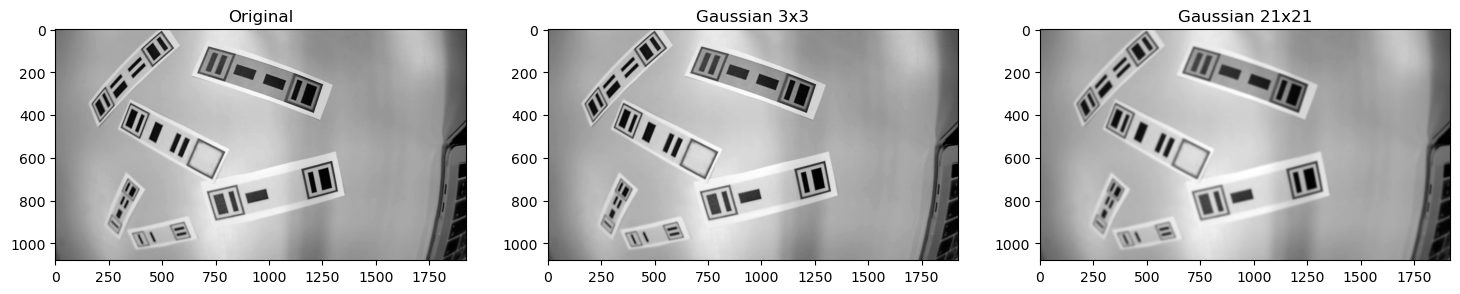

In [4]:
# Gaussian filter the image.
## Three different kernel sizes. The larger the kernel, the more the image is blurred.

img_rgb_gauss_3 = cv2.GaussianBlur(img_bw, (3, 3), 0)
img_rgb_gauss_11 = cv2.GaussianBlur(img_bw, (11, 11), 0)
img_rgb_gauss_21 = cv2.GaussianBlur(img_bw, (21, 21), 0)

# Display the images.
plt.figure(figsize=[18, 5])
plt.subplot(1, 3, 1), plt.imshow(img_bw, cmap='gray'), plt.title('Original')
plt.subplot(1, 3, 2), plt.imshow(img_rgb_gauss_3, cmap='gray'), plt.title('Gaussian 3x3')
plt.subplot(1, 3, 3), plt.imshow(img_rgb_gauss_21, cmap='gray'), plt.title('Gaussian 21x21')

## Median filter

The median filter is a non-linear filter that replaces each pixel with the median value of its neighborhood. It is useful for removing salt-and-pepper noise from images. The filter is defined by the following equation:

$$ M(x, y) = \text{median}(I(x, y)) $$

where $I(x, y)$ is the intensity of the pixel at coordinates $(x, y)$. The median value is calculated over a window of size $k \times k$ centered at the pixel. The window must have an odd size.

### Function sintax

```python
dst = cv2.medianBlur(src, ksize[, dst])
```

### Parameters

- `src`: The input image.
- `ksize`: The size of the kernel. It must be an odd number.
- `dst`: The output image.


(<Axes: title={'center': 'Median 21x21'}>,
 Text(0.5, 1.0, 'Median 21x21'))

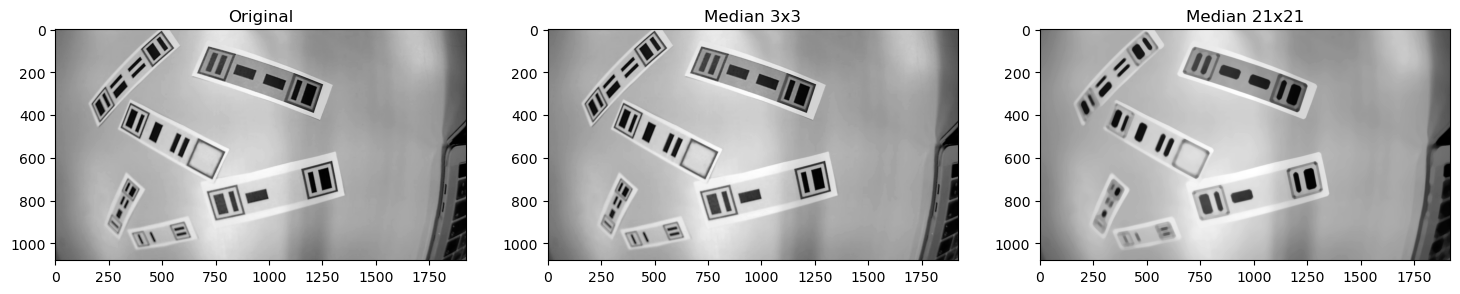

In [5]:
# Median filter the image.
## two different kernel sizes. The larger the kernel, the more the image is blurred.

img_rgb_median_3 = cv2.medianBlur(img_bw, 3)
img_rgb_median_21 = cv2.medianBlur(img_bw, 21)

# Display the images.
plt.figure(figsize=[18, 5])
plt.subplot(1, 3, 1), plt.imshow(img_bw, cmap='gray'), plt.title('Original')
plt.subplot(1, 3, 2), plt.imshow(img_rgb_median_3, cmap='gray'), plt.title('Median 3x3')
plt.subplot(1, 3, 3), plt.imshow(img_rgb_median_21, cmap='gray'), plt.title('Median 21x21')

## Bilateral filter

The bilateral filter is a non-linear filter that smooths images while preserving edges. It is useful for reducing noise and blurring images. The filter is defined by the following equation:

$$ B(x, y) = \frac{1}{W}\sum\_{i, j \in N}I(x + i, y + j)G(i, j, \sigma_s)G(I(x, y) - I(x + i, y + j), \sigma_r) $$

where $I(x, y)$ is the intensity of the pixel at coordinates $(x, y)$, $N$ is the neighborhood of the pixel, $W$ is the normalization factor, $G(i, j, \sigma_s)$ is the spatial Gaussian function, and $G(I(x, y) - I(x + i, y + j), \sigma_r)$ is the range Gaussian function.The spatial Gaussian function is defined as:

$$ G(i, j, \sigma_s) = e^{-\frac{i^2 + j^2}{2\sigma_s^2}} $$

and the range Gaussian function is defined as:

$$ G(I(x, y) - I(x + i, y + j), \sigma_r) = e^{-\frac{(I(x, y) - I(x + i, y + j))^2}{2\sigma_r^2}} $$

### Function sintax

```python
dst = cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])
```

### Parameters

- `src`: The input image.
- `d`: The diameter of the pixel neighborhood.
- `sigmaColor`: The standard deviation of the color space.
- `sigmaSpace`: The standard deviation of the spatial domain.
- `dst`: The output image.
- `borderType`: The border mode used to extrapolate pixels outside the image.


(<Axes: title={'center': 'Bilateral 3x3, 150'}>,
 Text(0.5, 1.0, 'Bilateral 3x3, 150'))

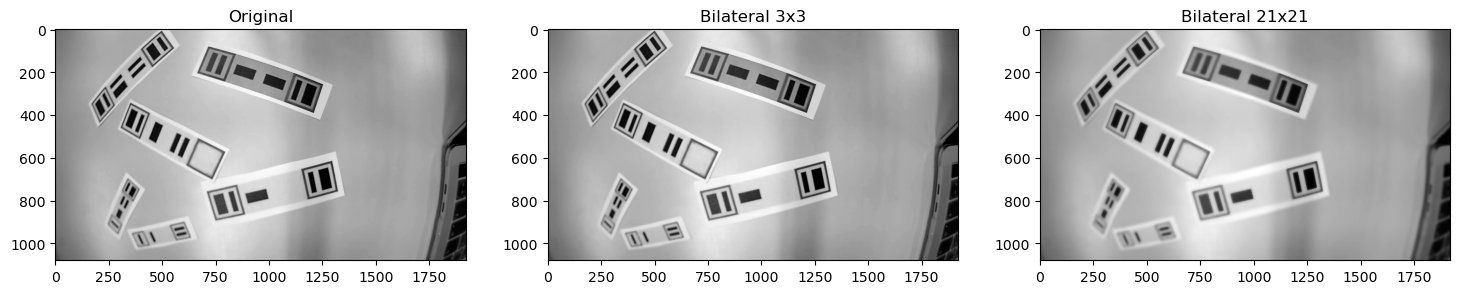

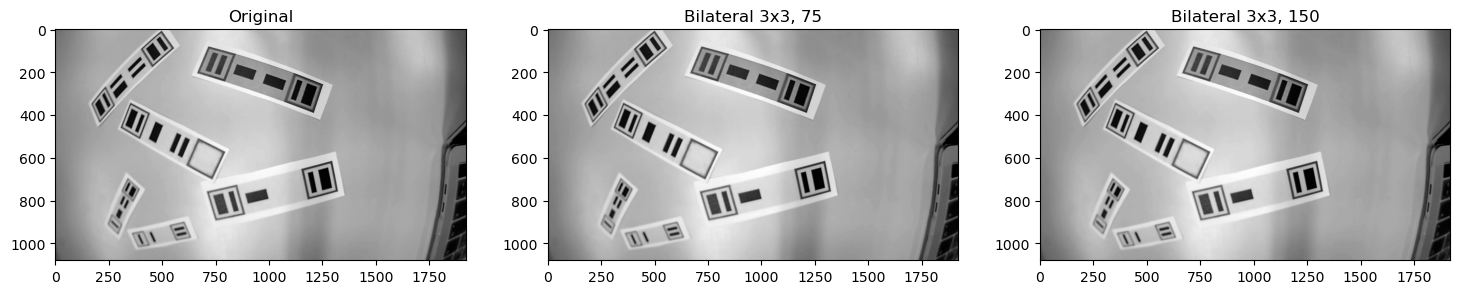

In [6]:
# Bilateral filter the image.
## Two different diameter values. The larger the diameter, the more the image is blurred.

img_rgb_bilateral_3 = cv2.bilateralFilter(img_bw, 3, 75, 75)
img_rgb_bilateral_21 = cv2.bilateralFilter(img_bw, 21, 75, 75)

# Display the images.
plt.figure(figsize=[18, 5])
plt.subplot(1, 3, 1), plt.imshow(img_bw, cmap='gray'), plt.title('Original')
plt.subplot(1, 3, 2), plt.imshow(img_rgb_bilateral_3, cmap='gray'), plt.title('Bilateral 3x3')
plt.subplot(1, 3, 3), plt.imshow(img_rgb_bilateral_21, cmap='gray'), plt.title('Bilateral 21x21')

## Two different sigma values. The larger the sigma, the more the image is blurred.
img_rgb_bilateral_3_75 = cv2.bilateralFilter(img_bw, 3, 75, 75)
img_rgb_bilateral_3_150 = cv2.bilateralFilter(img_bw, 3, 150, 150)

# Display the images.
plt.figure(figsize=[18, 5])
plt.subplot(1, 3, 1), plt.imshow(img_bw, cmap='gray'), plt.title('Original')
plt.subplot(1, 3, 2), plt.imshow(img_rgb_bilateral_3_75, cmap='gray'), plt.title('Bilateral 3x3, 75')
plt.subplot(1, 3, 3), plt.imshow(img_rgb_bilateral_3_150, cmap='gray'), plt.title('Bilateral 3x3, 150')

## Sobel filter

The Sobel filter is a gradient filter that calculates the first derivative of an image. It is useful for edge detection. The filter is defined by the following equations:

$$ G_x = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix} $$
$$ G_y = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix} $$
$$ G = \sqrt{G_x^2 + G_y^2} $$

where $G_x$ and $G_y$ are the horizontal and vertical gradients, respectively, and $G$ is the magnitude of the gradient.

### Function sintax

```python
dst = cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]])
```

### Parameters

- `src`: input image
- `ddepth`: output image depth
- `dx`: order of the derivative in x-direction
- `dy`: order of the derivative in y-direction
- `dst`: output image
- `ksize`: size of the extended Sobel kernel
- `scale`: optional scale factor for the computed derivative values
- `delta`: optional delta value that is added to the results prior to storing them in `dst`
- `borderType`: pixel extrapolation method (see `cv2.copyMakeBorder`)


(<matplotlib.image.AxesImage at 0x24d3bc27e00>, Text(0.5, 1.0, 'Sobel'))

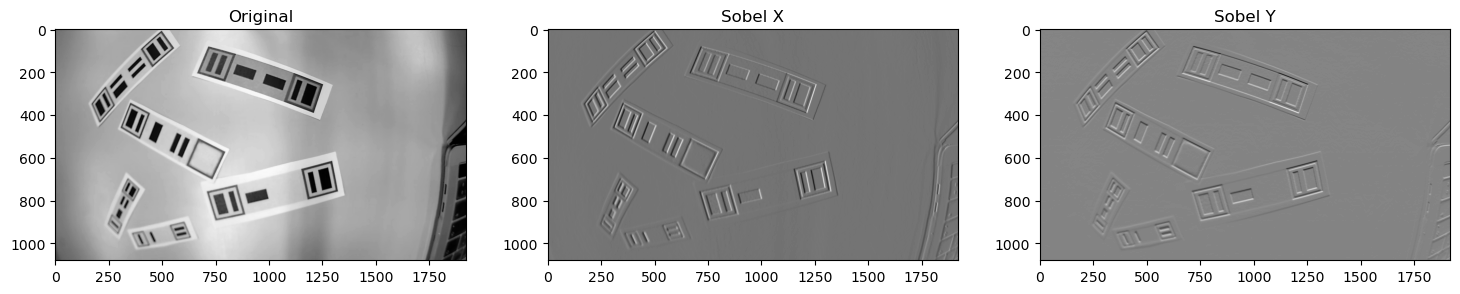

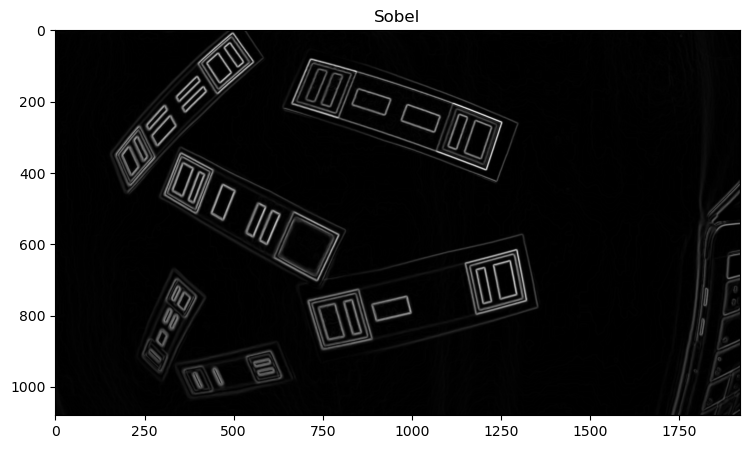

In [7]:
# Sobel filter the image.
## Apply the Sobel filter to the image. The Sobel filter is used to find the edges in an image.

img_rgb_sobel_x = cv2.Sobel(img_bw, cv2.CV_64F, 1, 0, ksize=11) # ksize is the kernel size
img_rgb_sobel_y = cv2.Sobel(img_bw, cv2.CV_64F, 0, 1, ksize=11) 
img_rgb_sobel = np.sqrt(img_rgb_sobel_x**2 + img_rgb_sobel_y**2)

# Display the images.
plt.figure(figsize=[18, 5])
plt.subplot(1, 3, 1), plt.imshow(img_bw, cmap='gray'), plt.title('Original')
plt.subplot(1, 3, 2), plt.imshow(img_rgb_sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(1, 3, 3), plt.imshow(img_rgb_sobel_y, cmap='gray'), plt.title('Sobel Y')

# Display the sobel image
plt.figure(figsize=[18, 5])
plt.imshow(img_rgb_sobel, cmap='gray'), plt.title('Sobel')

## Scharr filter

The Scharr filter is a gradient filter that calculates the first derivative of an image. It is similar to the Sobel filter but has a different kernel. The filter is defined by the following equations:

\begin{align*} G_x &= \begin{bmatrix} -3 & 0 & 3 \\ -10 & 0 & 10 \\ -3 & 0 & 3 \end{bmatrix} \\ G_y &= \begin{bmatrix} -3 & -10 & -3 \\ 0 & 0 & 0 \\ 3 & 10 & 3 \end{bmatrix} \\ G &= \sqrt{G_x^2 + G_y^2} \end{align*}

where $G_x$ and $G_y$ are the horizontal and vertical gradients, respectively, and $G$ is the magnitude of the gradient.

### Function sintax

```python
dst = cv2.Scharr(src, ddepth, dx, dy[, dst[, scale[, delta[, borderType]]])
```

### Parameters

- `src`: input image
- `ddepth`: output image depth
- `dx`: order of the derivative in x-direction
- `dy`: order of the derivative in y-direction
- `dst`: output image
- `scale`: optional scale factor for the computed derivative values
- `delta`: optional delta value that is added to the results prior to storing them in `dst`
- `borderType`: pixel extrapolation method (see `cv2.copyMakeBorder`)


(<matplotlib.image.AxesImage at 0x24d393fbec0>, Text(0.5, 1.0, 'Scharr'))

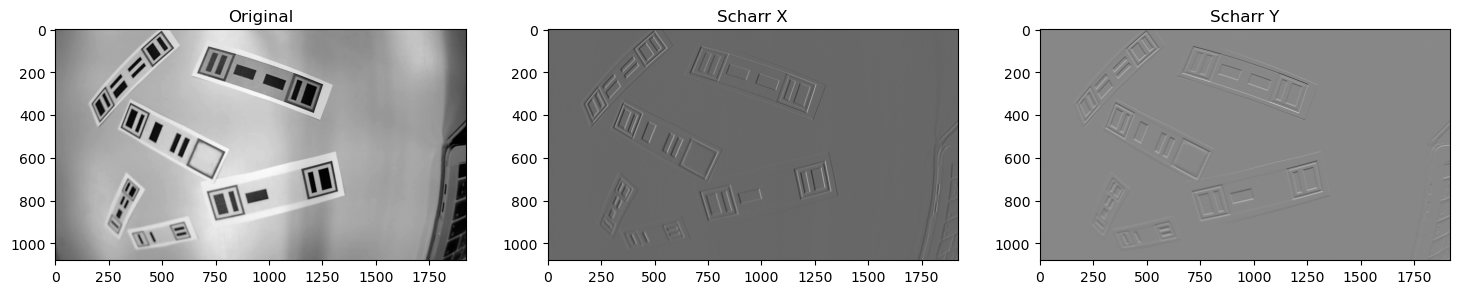

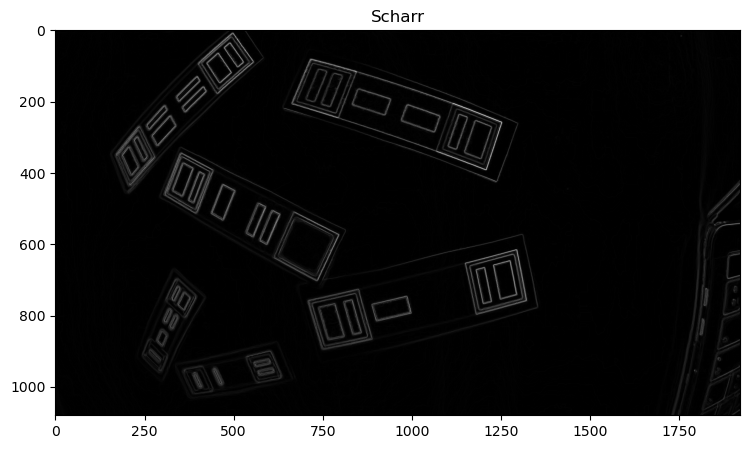

In [8]:
# Scharr filter the image.
## Apply the Scharr filter to the image. The Scharr filter is used to find the edges in an image.

img_rgb_scharr_x = cv2.Scharr(img_bw, cv2.CV_64F, 1, 0)
img_rgb_scharr_y = cv2.Scharr(img_bw, cv2.CV_64F, 0, 1)
img_rgb_scharr = np.sqrt(img_rgb_scharr_x**2 + img_rgb_scharr_y**2)

# Display the images.
plt.figure(figsize=[18, 5])
plt.subplot(1, 3, 1), plt.imshow(img_bw, cmap='gray'), plt.title('Original')
plt.subplot(1, 3, 2), plt.imshow(img_rgb_scharr_x, cmap='gray'), plt.title('Scharr X')
plt.subplot(1, 3, 3), plt.imshow(img_rgb_scharr_y, cmap='gray'), plt.title('Scharr Y')

# Display the scharr image
plt.figure(figsize=[18, 5])
plt.imshow(img_rgb_scharr, cmap='gray'), plt.title('Scharr')

### Compare Sobel and Scharr filters


(<Axes: title={'center': 'Scharr'}>,
 Text(0.5, 1.0, 'Scharr'))

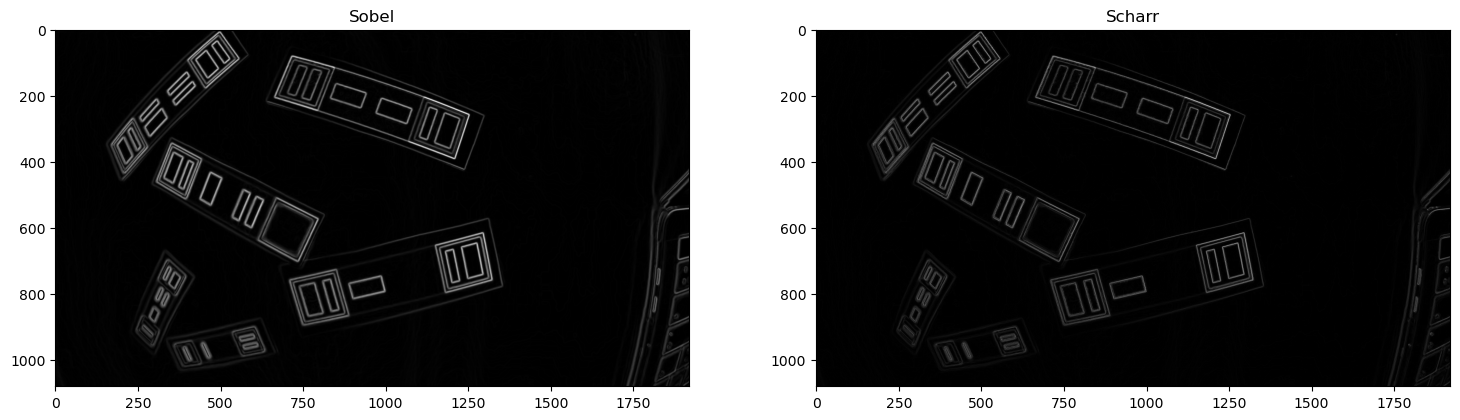

In [9]:
# Plot the comparison of the Sobel and Scharr filters.

plt.figure(figsize=[18, 5])
plt.subplot(1, 2, 1), plt.imshow(img_rgb_sobel, cmap='gray'), plt.title('Sobel')
plt.subplot(1, 2, 2), plt.imshow(img_rgb_scharr, cmap='gray'), plt.title('Scharr')

## Laplacian filter

The Laplacian filter is a second-order derivative filter that calculates the Laplacian of an image. It is useful for edge detection. The filter is defined by the following equation:

$$ L(x, y) = \nabla^2I(x, y) = \frac{\partial^2I(x, y)}{\partial x^2} + \frac{\partial^2I(x, y)}{\partial y^2} $$
$$ L(x, y) = \frac{\partial^2I(x, y)}{\partial x^2} + \frac{\partial^2I(x, y)}{\partial y^2} $$

### Function sintax

```python
dst = cv2.Laplacian(src, ddepth[, dst[, ksize[, scale[, delta[, borderType]]]])
```

### Parameters

- `src`: input image
- `ddepth`: output image depth
- `dst`: output image
- `ksize`: size of the extended Sobel kernel
- `scale`: optional scale factor for the computed derivative values
- `delta`: optional delta value that is added to the results prior to storing them in `dst`
- `borderType`: pixel extrapolation method (see `cv2.copyMakeBorder`)


(<Axes: title={'center': 'Laplacian'}>,
 Text(0.5, 1.0, 'Laplacian'))

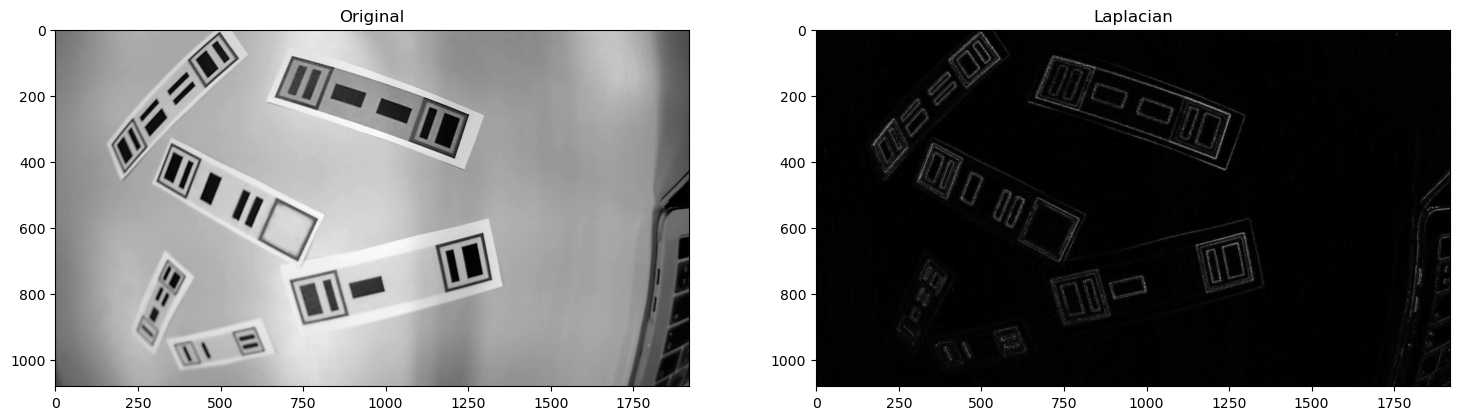

In [10]:
# Laplacian filter the image.
## Apply the Laplacian filter to the image. The Laplacian filter is used to find the edges in an image.

img_rgb_laplacian = cv2.Laplacian(img_bw, cv2.CV_64F, ksize=3)
# Convert the image to grayscale.
img_rgb_laplacian = np.uint8(np.absolute(img_rgb_laplacian))

# Display the images.
plt.figure(figsize=[18, 5])
plt.subplot(1, 2, 1), plt.imshow(img_bw, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(img_rgb_laplacian, cmap='gray'), plt.title('Laplacian')

## Canny filter

The Canny filter is an edge detection filter that uses the following steps:

1. Apply a Gaussian filter to the image to reduce noise.
2. Calculate the gradient of the image using the Sobel filter.
3. Apply non-maximum suppression to thin the edges.
4. Apply double thresholding to determine the edges.
5. Apply edge tracking by hysteresis to connect the edges.

### Function sintax

```python
edges = cv2.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]])
```

- `image`: The input image.
- `threshold1`: The lower threshold for the hysteresis procedure.
- `threshold2`: The upper threshold for the hysteresis procedure.
- `edges`: The output edge map.
- `apertureSize`: The aperture size for the Sobel operator.
- `L2gradient`: A flag indicating whether to use the $L_2$-norm for the gradient magnitude.


(<Axes: title={'center': 'Canny'}>,
 Text(0.5, 1.0, 'Canny'))

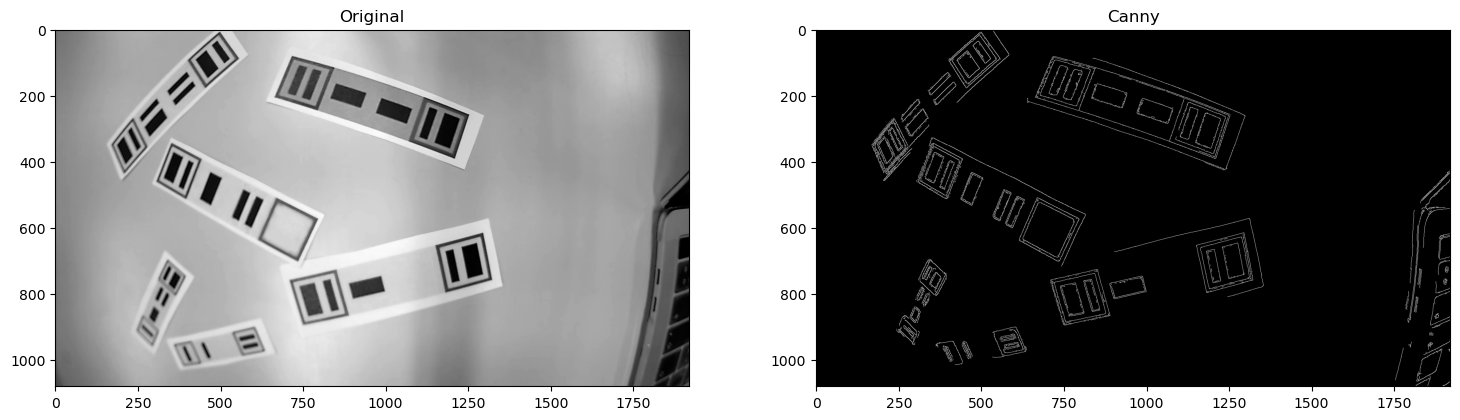

In [11]:
# Canny filter the image. 
## Apply the Canny filter to the image. The Canny filter is used to find the edges in an image.
## We need to specify the lower and upper thresholds for the Canny filter. 

img_rgb_canny = cv2.Canny(img_bw, 20, 100, L2gradient=True, apertureSize=3)
# Display the image with the Canny filter applied.
plt.figure(figsize=[18, 5])
plt.subplot(1, 2, 1), plt.imshow(img_bw, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(img_rgb_canny, cmap='gray'), plt.title('Canny')


## Threshold filter

The threshold filter is a binary filter that converts an image into a binary image. It is useful for segmenting images. The filter is defined by the following equation:

$$ T(x, y) = \begin{cases} 0 & \text{if } I(x, y) < \text{threshold} \\ 255 & \text{if } I(x, y) \geq \text{threshold} \end{cases} $$

where $I(x, y)$ is the intensity of the pixel at coordinates $(x, y)$, and $\text{threshold}$ is the threshold value.

### Function sintax

```python
ret, dst = cv2.threshold(src, thresh, maxval, type[, dst])
```

### Parameters

- `src`: The input image.
- `thresh`: The threshold value.
- `maxval`: The maximum value to use with the `cv2.THRESH_BINARY` and `cv2.THRESH_BINARY_INV` types.
- `type`: The thresholding type. It can be one of the following:
  - `cv2.THRESH_BINARY`: The pixel value is set to `maxval` if it is greater than `thresh`, otherwise it is set to zero.
  - `cv2.THRESH_BINARY_INV`: The pixel value is set to zero if it is greater than `thresh`, otherwise it is set to `maxval`.
  - `cv2.THRESH_TRUNC`: The pixel value is set to `thresh` if it is greater than `thresh`, otherwise it is unchanged.
  - `cv2.THRESH_TOZERO`: The pixel value is set to zero if it is less than `thresh`, otherwise it is unchanged.
  - `cv2.THRESH_TOZERO_INV`: The pixel value is set to zero if it is greater than `thresh`, otherwise it is unchanged.
- `dst`: The output image.


(<Axes: title={'center': 'Threshold 110'}>,
 Text(0.5, 1.0, 'Threshold 110'))

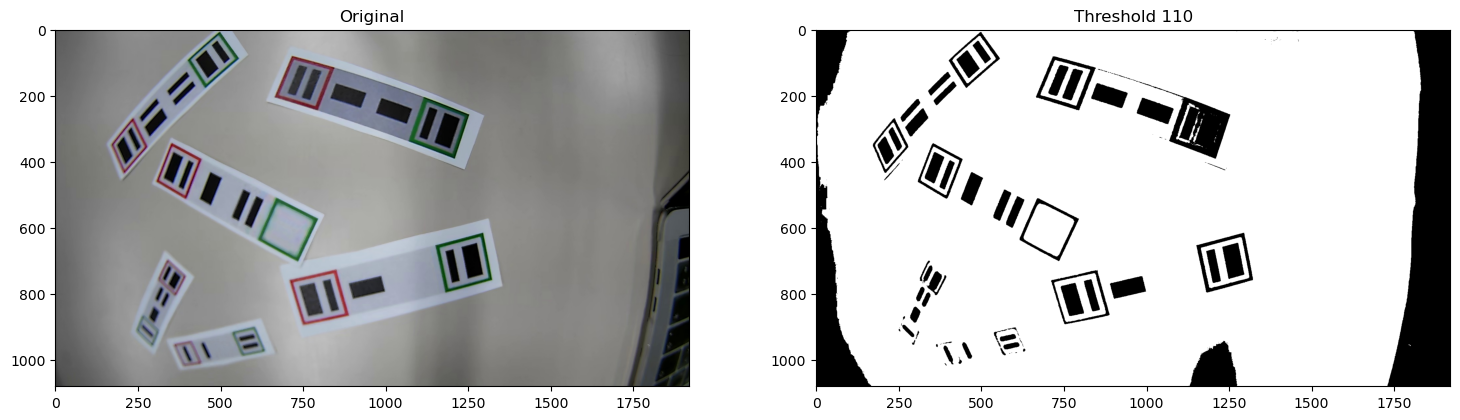

In [29]:
# Threshold the image.
## Apply a threshold to the image. The threshold is used to find the edges in an image.
## We need to specify the threshold value and the maximum value.

ret, img_rgb_thresh = cv2.threshold(img_bw, 110, 255, cv2.THRESH_BINARY)
# Display the image with the threshold applied.

plt.figure(figsize=[18, 5])
plt.subplot(1, 2, 1), plt.imshow(img_rgb, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(img_rgb_thresh, cmap='gray'), plt.title('Threshold 110')

## Adaptive threshold filter

The adaptive threshold filter is a binary filter that converts an image into a binary image. It is useful for segmenting images with varying illumination. The filter is defined by the following equation:

$$ T(x, y) = \begin{cases} 0 & \text{if } I(x, y) < \text{threshold} \\ 255 & \text{if } I(x, y) \geq \text{threshold} \end{cases} $$

where $I(x, y)$ is the intensity of the pixel at coordinates $(x, y)$, and $\text{threshold}$ is the threshold value.

### Function sintax

```python
dst = cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst])
```

### Parameters

- `src`: The input image.
- `maxValue`: The maximum value to use with the `cv2.THRESH_BINARY` and `cv2.THRESH_BINARY_INV` types.
- `adaptiveMethod`: The adaptive thresholding method. It can be one of the following:
  - `cv2.ADAPTIVE_THRESH_MEAN_C`: The threshold value is the mean of the neighborhood.
  - `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`: The threshold value is the weighted sum of the neighborhood.
- `thresholdType`: The thresholding type. It can be one of the following:
  - `cv2.THRESH_BINARY`: The pixel value is set to `maxval` if it is greater than `thresh`, otherwise it is set to zero.
  - `cv2.THRESH_BINARY_INV`: The pixel value is set to zero if it is greater than `thresh`, otherwise it is set to `maxval`.
- `blockSize`: The size of the neighborhood.
- `C`: The constant to subtract from the mean or weighted sum.
- `dst`: The output image.


(<Axes: title={'center': 'Adaptive Threshold'}>,
 Text(0.5, 1.0, 'Adaptive Threshold'))

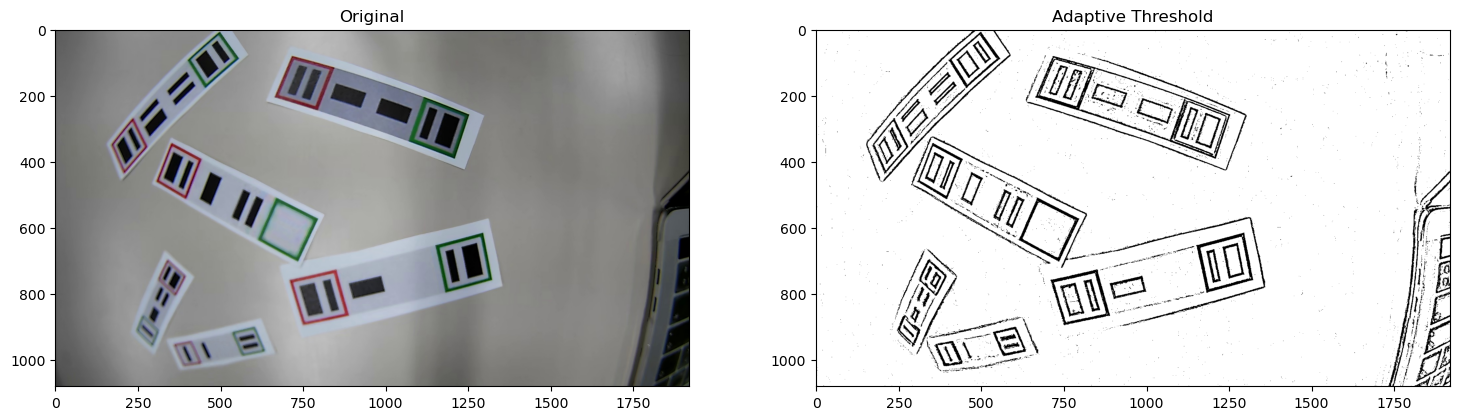

In [28]:
# Adaptive threshold the image.

img_rgb_adaptive_thresh = cv2.adaptiveThreshold(img_bw, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)

# Display the image with the adaptive threshold applied.
plt.figure(figsize=[18, 5])
plt.subplot(1, 2, 1), plt.imshow(img_rgb, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(img_rgb_adaptive_thresh, cmap='gray'), plt.title('Adaptive Threshold')

## Otsu threshold filter

The Otsu threshold filter is a binary filter that converts an image into a binary image. It is useful for segmenting images. The filter is defined by the following equation:

$$ T(x, y) = \begin{cases} 0 & \text{if } I(x, y) < \text{threshold} \\ 255 & \text{if } I(x, y) \geq \text{threshold} \end{cases} $$

where $I(x, y)$ is the intensity of the pixel at coordinates $(x, y)$, and $\text{threshold}$ is the threshold value.

### Function sintax

```python
ret, dst = cv2.threshold(src, thresh, maxval, type)
```

### Parameters

- `src`: The input image.
- `thresh`: The threshold value.
- `maxval`: The maximum value to use with the `cv2.THRESH_BINARY` and `cv2.THRESH_BINARY_INV` types.
- `type`: The thresholding type. It can be one of the following:
  - `cv2.THRESH_BINARY`: The pixel value is set to `maxval` if it is greater than `thresh`, otherwise it is set to zero.
  - `cv2.THRESH_BINARY_INV`: The pixel value is set to zero if it is greater than `thresh`, otherwise it is set to `maxval`.
  - `cv2.THRESH_TRUNC`: The pixel value is set to `thresh` if it is greater than `thresh`, otherwise it is unchanged.
  - `cv2.THRESH_TOZERO`: The pixel value is set to zero if it is less than `thresh`, otherwise it is unchanged.
  - `cv2.THRESH_TOZERO_INV`: The pixel value is set to zero if it is greater than `thresh`, otherwise it is unchanged.
  - `cv2.THRESH_OTSU`: The threshold value is determined using
  - `cv2.THRESH_TRIANGLE`: The threshold value is determined using the triangle algorithm.
- `dst`: The output image.
- `ret`: The threshold value used.


(<Axes: title={'center': 'Otsu Threshold'}>,
 Text(0.5, 1.0, 'Otsu Threshold'))

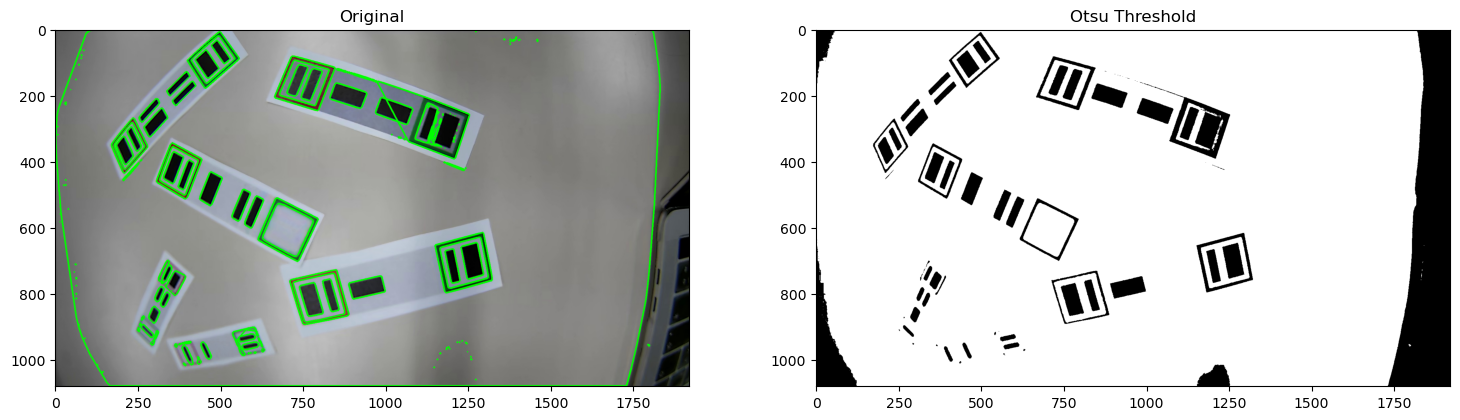

In [59]:
# Otsu threshold the image.

ret, img_rgb_otsu_thresh = cv2.threshold(img_bw, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the image with the Otsu threshold applied.
plt.figure(figsize=[18, 5])
plt.subplot(1, 2, 1), plt.imshow(img_rgb, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(img_rgb_otsu_thresh, cmap='gray'), plt.title('Otsu Threshold')

## Contour filter

The contour filter is a binary filter that finds the contours of an image. It is useful for detecting objects in images. The filter is defined by the following equation:

$$ C = \{(x, y) \mid I(x, y) = 255\} $$

where $I(x, y)$ is the intensity of the pixel at coordinates $(x, y)$. The contour is a set of points that form a closed curve around the object.

### Function sintax

```python
contours, hierarchy = cv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]])
```

### Parameters

- `image`: The input image.
- `mode`: The contour retrieval mode. It can be one of the following:
  - `cv2.RETR_EXTERNAL`: Retrieves only the external contours.
  - `cv2.RETR_LIST`: Retrieves all the contours.
  - `cv2.RETR_CCOMP`: Retrieves the two-level hierarchy.
  - `cv2.RETR_TREE`: Retrieves the full hierarchy.
- `method`: The contour approximation method. It can be one of the following:
- `cv2.CHAIN_APPROX_NONE`: Stores all the contour points.
- `cv2.CHAIN_APPROX_SIMPLE`: Stores only the endpoints of the contour.
- `cv2.CHAIN_APPROX_TC89_L1`: Applies the Teh-Chin chain approximation algorithm.
- `cv2.CHAIN_APPROX_TC89_KCOS`: Applies the Teh-Chin chain approximation algorithm.
- `contours`: The output contours.
- `hierarchy`: The output hierarchy.
- `offset`: The offset to add to the contour points.


Number of contours found = 230


(<Axes: title={'center': 'Contours'}>,
 Text(0.5, 1.0, 'Contours'))

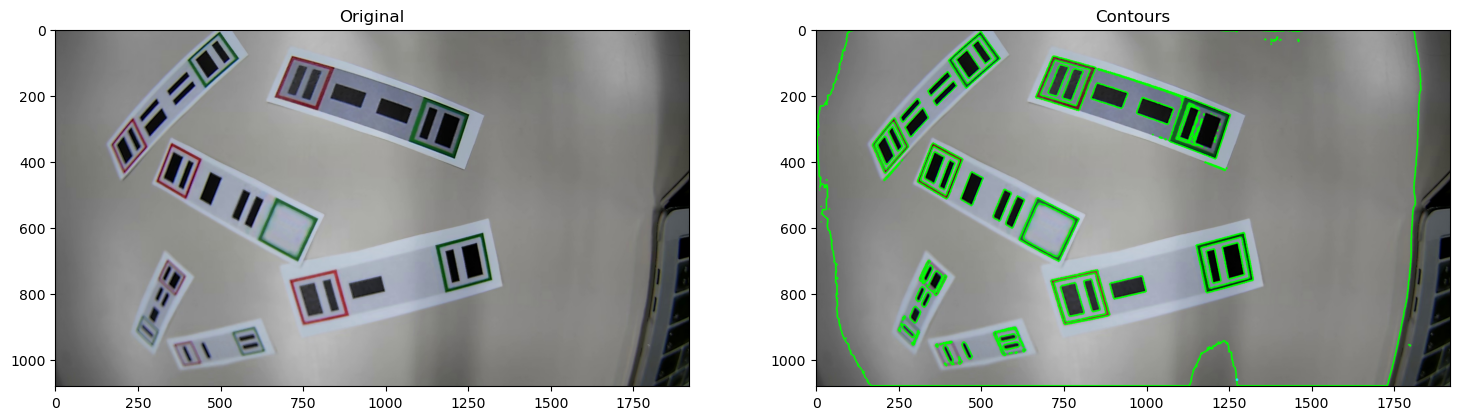

In [67]:
# Contour the image.
## Find the contours in the image. Contours are used to find the edges in an image.

contours, hierarchy = cv2.findContours(img_rgb_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

print('Number of contours found =', len(contours))

# Draw the contours on the image.
img_rgb_contour = cv2.drawContours(img_rgb, contours, -1, (0, 255, 0), 3)

# Display the image with the contours drawn.
plt.figure(figsize=[18, 5])
plt.subplot(1, 2, 1), plt.imshow(img_rgb, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(img_rgb_contour, cmap='gray'), plt.title('Contours')

## Convex hull filter

The convex hull filter is a binary filter that finds the convex hull of an image. It is useful for detecting the outer boundary of objects in images. The filter is defined by the following equation:

$$ H = \text{convexHull}(C) $$

where $C$ is the contour of the object and $H$ is the convex hull of the object.

### Function sintax

```python
hull = cv2.convexHull(points[, hull[, clockwise[, returnPoints]]])
```

### Parameters

- `points`: The contour of the object. It can be a single array of points or a list of arrays of points.
- `hull`: The convex hull of the object.
- `clockwise`: A flag indicating whether the output points should be in clockwise order.
- `returnPoints`: A flag indicating whether the output should be the points of the convex hull.


## Approximation filter

The approximation filter is a binary filter that approximates the contour of an object. It is useful for reducing the number of points in the contour. The filter is defined by the following equation:

$$ A = \text{approxPolyDP}(C, \epsilon, \text{closed}) $$

where $C$ is the contour of the object, $A$ is the approximation of the contour, $\epsilon$ is the maximum distance between the original contour and the approximation, and $\text{closed}$ is a flag indicating whether the contour is closed.

### Function sintax

```python
approx = cv2.approxPolyDP(curve, epsilon, closed[, approxCurve])
```

### Parameters

- `curve`: The contour of the object.
- `epsilon`: The maximum distance between the original contour and the approximation.
- `closed`: A flag indicating whether the contour is closed.
- `approxCurve`: The approximation of the contour.

### Return Value

- `approx`: The approximation of the contour.


Text(0.5, 1.0, 'Approximated Contours')

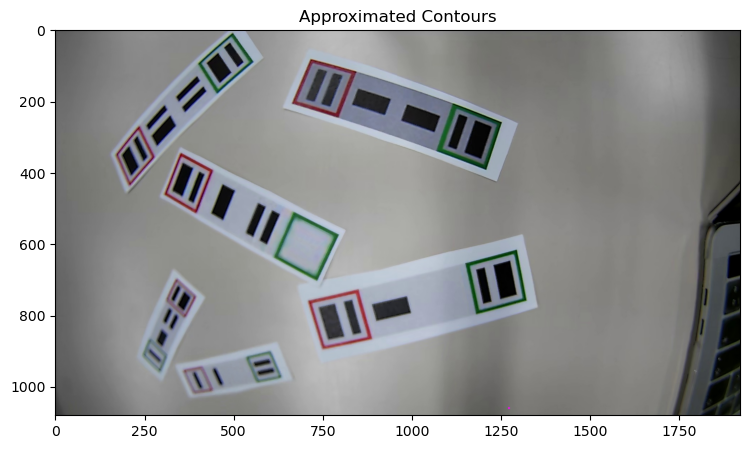

In [69]:
# Approximate the contours.

epsilon = 0.1 * cv2.arcLength(contours[0], True)
approx = cv2.approxPolyDP(contours[0], epsilon, True)

# Draw the approximated contours on the image.
cv2.drawContours(img_rgb, [approx], -1, (255, 0, 255), 3)

# Display the image with the approximated contours drawn.
plt.figure(figsize=[18, 5]); plt.imshow(img_rgb, cmap='gray') ; plt.title('Approximated Contours')



## Bounding box filter

The bounding box filter is a binary filter that finds the bounding box of an object. It is useful for detecting the position and size of objects in images. The filter is defined by the following equation:

$$ (x, y, w, h) = \text{boundingRect}(C) $$

where $C$ is the contour of the object, $(x, y)$ is the top-left corner of the bounding box, $w$ is the width of the bounding box, and $h$ is the height of the bounding box.

### Function sintax

```python
x, y, w, h = cv2.boundingRect(points)
```

### Parameters

- `points`: The contour of the object.
- `x`: The x-coordinate of the top-left corner of the bounding box.
- `y`: The y-coordinate of the top-left corner of the bounding box.
- `w`: The width of the bounding box.
- `h`: The height of the bounding box.


Text(0.5, 1.0, 'Bounding Box')

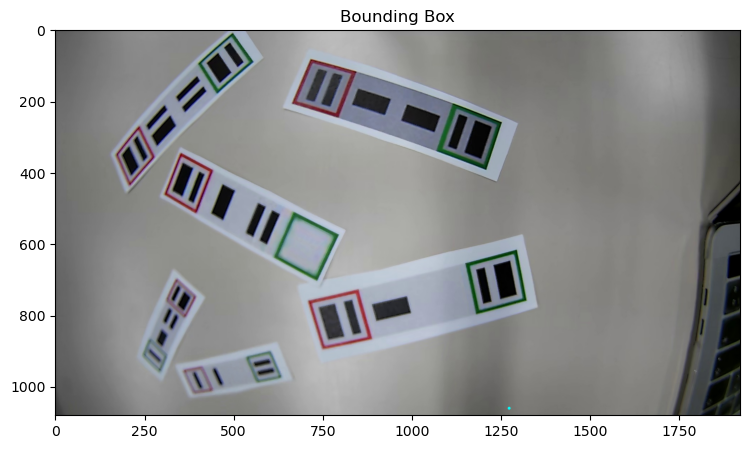

In [70]:
# Boundig box the image.

x, y, w, h = cv2.boundingRect(contours[0])
cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (0, 255, 255), 3)

# Display the image with the bounding box drawn.
plt.figure(figsize=[18, 5]); plt.imshow(img_rgb, cmap='gray') ; plt.title('Bounding Box')